In [1]:
# Thamys Abrahao - 06/2018
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
# Tipo de login
with open('premium_payments.json', 'r') as f:
    data = json.load(f)
    
df_premium = pd.DataFrame(data)

In [3]:
# quantificando o total de arquivos visualizados
with open('fileViews.json', 'r') as f:
    data = json.load(f)
    
df_fileViews = pd.DataFrame(data)
df_fileViews.shape

(3028983, 4)

In [4]:
df = pd.merge(df_fileViews, df_premium, how='outer', on='StudentId', indicator=True)

In [5]:
df.head()

,FileName,StudentId,Studentclient,ViewDate,PaymentDate,PlanType,_merge
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2017-05-26 22:25:03.000000,Anual,both
1,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2018-05-26 10:05:28.000000,Anual,both
2,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2016-07-21 19:57:57.717000,Mensal,both
3,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2016-08-21 08:47:42.947000,Mensal,both
4,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2016-09-21 08:54:06.270000,Mensal,both


In [8]:
df_f = df
print(df_f.shape)
df_f.head()

(4543841, 7)


,FileName,StudentId,Studentclient,ViewDate,PaymentDate,PlanType,_merge
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2017-05-26 22:25:03.000000,Anual,both
1,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2018-05-26 10:05:28.000000,Anual,both
2,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2016-07-21 19:57:57.717000,Mensal,both
3,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2016-08-21 08:47:42.947000,Mensal,both
4,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000,2016-09-21 08:54:06.270000,Mensal,both


In [9]:
df_f = df_f[['FileName', 'StudentId', 'ViewDate']]
df_f = df_f.drop_duplicates()
print(df_f.shape)
print(df_f.dtypes)
df_f.head()

(3005034, 3)
FileName     object
StudentId     int64
ViewDate     object
dtype: object


,FileName,StudentId,ViewDate
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:03.047000
20,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:12.370000
40,CALCULO I,12970655,2017-05-25 22:39:48.000000
60,CALCULO I,12970655,2017-05-25 22:40:36.000000
80,CALCULO I,12970655,2017-05-25 22:43:16.000000


In [10]:
df_f = df_f.dropna(subset=['ViewDate']) #.info()

In [11]:
df_f.dtypes

FileName     object
StudentId     int64
ViewDate     object
dtype: object

In [13]:
df_f.loc[:, 'date'] = pd.to_datetime(df_f['ViewDate'])
df_f.loc[:, 'date'] = df_f['date'].dt.normalize()
df_f.drop('ViewDate', axis=1, inplace=True)
df_f.head()

,FileName,StudentId,date
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23
20,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23
40,CALCULO I,12970655,2017-05-25
60,CALCULO I,12970655,2017-05-25
80,CALCULO I,12970655,2017-05-25


In [14]:
df_f['Periodo'] = df_f.date.apply(lambda x: x.strftime('%Y-%m'))
df_f['fileViews'] = 1
df_f.head()

,FileName,StudentId,date,Periodo,fileViews
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23,2017-02,1
20,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23,2017-02,1
40,CALCULO I,12970655,2017-05-25,2017-05,1
60,CALCULO I,12970655,2017-05-25,2017-05,1
80,CALCULO I,12970655,2017-05-25,2017-05,1


In [14]:
#df_f[df_f.StudentId == 94564987]

In [15]:
df_f.set_index('StudentId', inplace=True)

df_f['Grupo_Coorte'] = df_f.groupby(level=0)['date'].min().apply(lambda x: x.strftime('%Y-%m'))
df_f.reset_index(inplace=True)
df_f.head()

,StudentId,FileName,date,Periodo,fileViews,Grupo_Coorte
0,12970655,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23,2017-02,1,2016-12
1,12970655,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23,2017-02,1,2016-12
2,12970655,CALCULO I,2017-05-25,2017-05,1,2016-12
3,12970655,CALCULO I,2017-05-25,2017-05,1,2016-12
4,12970655,CALCULO I,2017-05-25,2017-05,1,2016-12


In [16]:
df_f[df_f.Grupo_Coorte == '2018-01']


,StudentId,FileName,date,Periodo,fileViews,Grupo_Coorte
78169,52697032,Revisão - ERA VARGAS COM GABARITO,2018-01-25,2018-01,1,2018-01
78170,52697032,GABARITOS FGV CURSOS GRATUITOS ONLINE,2018-01-25,2018-01,1,2018-01
78171,52697032,Gabarito do Curso de Filosofia do FGV Gratui...,2018-01-25,2018-01,1,2018-01
79358,41734008,Apostila SUS para Concursos 2016 -atualizacao ...,2018-01-09,2018-01,1,2018-01
79359,41734008,Humaniza SUS,2018-01-07,2018-01,1,2018-01
82522,54734025,Revisão Anual de Patologia das plantas - Capit...,2018-01-17,2018-01,1,2018-01
86613,54084079,"NOGUEIRA, Duda. Questões Comentadas de Lingua ...",2018-01-05,2018-01,1,2018-01
103624,68505252,OBJETIVA BANCO DE DADOS Nota 100,2018-01-11,2018-01,1,2018-01
128339,76566006,Didática - Revisão da aula 01 a 10,2018-04-01,2018-04,1,2018-01
128340,76566006,Desenho Técnico - Caligrafia Técnica,2018-01-22,2018-01,1,2018-01


In [17]:
grouped = df_f.groupby(['Grupo_Coorte', 'Periodo'])

# contagem dos usuários unicos, visualizacoes por grupo de coorte e periodo
cohorts = grouped.agg({'StudentId': pd.Series.nunique,
                       'fileViews': np.sum})
cohorts.rename(columns={'StudentId': 'TotalUsers',
                        'fileViews': 'TotalfileViews'}, inplace=True)
cohorts #.head()

TotalUsers  TotalfileViews
Grupo_Coorte Periodo                            
2016-11      2016-11        3081           15369
             2016-12        1748           21834
             2017-01         475            2179
             2017-02         803            6627
             2017-03        1492           27010
             2017-04        1850           44133
             2017-05        1928           59781
             2017-06        1979           63648
             2017-07         824            9909
             2017-08        1262           14069
             2017-09        1845           40400
             2017-10        2029           51333
             2017-11        2832           61406
             2017-12        1193           11334
             2018-01         396            1383
             2018-02         562            3045
             2018-03        1064            7947
             2018-04        1397           19604
             2018-05        1511           38432
             2018-06         783           12760
2016-12      2016-12        4102           25689
             2017-01         804            4005
             2017-02        1025            5777
             2017-03        1793           25138
             2017-04        2140           40030
             2017-05        2293           48357
             2017-06        2396           50993
             2017-07        1199           11567
             2017-08        1597           13608
             2017-09        2244           38125
...                          ...             ...
2017-11      2018-05        2624           28145
             2018-06        1087            7737
2017-12      2017-12         320            1536
             2018-01          43             139
             2018-02          35             112
             2018-03          54             258
             2018-04          65             370
             2018-05          71             502
             2018-06          35             151
2018-01      2018-01         114             275
             2018-02          23              66
             2018-03          26              63
             2018-04          20              55
             2018-05          16              47
             2018-06           5               7
2018-02      2018-02         124             377
             2018-03          49             267
             2018-04          44             465
             2018-05          37             401
             2018-06          18             121
2018-03      2018-03         260             978
             2018-04         117             953
             2018-05          99             572
             2018-06          34             145
2018-04      2018-04         350            1842
             2018-05         155             873
             2018-06          61             211
2018-05      2018-05         313            1404
             2018-06          69             226
2018-06      2018-06          52             135

[210 rows x 2 columns]

In [18]:
def periodo_coorte(df_f):
   
    df_f['Periodo_Coorte'] = np.arange(len(df_f)) + 1
    return df_f

cohorts = cohorts.groupby(level=0).apply(periodo_coorte)
cohorts.head()

TotalUsers  TotalfileViews  Periodo_Coorte
Grupo_Coorte Periodo                                            
2016-11      2016-11        3081           15369               1
             2016-12        1748           21834               2
             2017-01         475            2179               3
             2017-02         803            6627               4
             2017-03        1492           27010               5

In [19]:
x = df_f[(df_f.Grupo_Coorte == '2017-01') & (df_f.Periodo == '2017-01')]
y = cohorts.ix[('2017-01', '2017-01')]

# conferindo os resultados
assert(x['StudentId'].nunique() == y['TotalUsers'])
assert(x['fileViews'].sum() == y['TotalfileViews'])


In [20]:
# mudando o index
cohorts.reset_index(inplace=True)
cohorts.set_index(['Grupo_Coorte', 'Periodo_Coorte'], inplace=True)

# serie com o totla de usuarios por corte
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size#.head()

Grupo_Coorte
2016-11     3081
2016-12     4102
2017-01     1357
2017-02     2175
2017-03     4516
2017-04     4014
2017-05     3507
2017-06     3503
2017-07     1132
2017-08     2982
2017-09     5007
2017-10     5072
2017-11    14183
2017-12      320
2018-01      114
2018-02      124
2018-03      260
2018-04      350
2018-05      313
2018-06       52
Name: TotalUsers, dtype: int64

In [21]:
cohorts['TotalUsers'].head()

Grupo_Coorte  Periodo_Coorte
2016-11       1                 3081
              2                 1748
              3                  475
              4                  803
              5                 1492
Name: TotalUsers, dtype: int64

In [22]:
cohorts['TotalUsers'].unstack(0).head()

Grupo_Coorte,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
Periodo_Coorte,,,,,,,,,,,,,,,,,,,,
1,3081.0,4102.0,1357.0,2175.0,4516.0,4014.0,3507.0,3503.0,1132.0,2982.0,5007.0,5072.0,14183.0,320.0,114.0,124.0,260.0,350.0,313.0,52.0
2,1748.0,804.0,637.0,1248.0,2606.0,2328.0,1893.0,848.0,484.0,1806.0,2859.0,4229.0,2525.0,43.0,23.0,49.0,117.0,155.0,69.0,NaN
3,475.0,1025.0,669.0,1104.0,2432.0,2258.0,719.0,1151.0,566.0,1648.0,4196.0,1303.0,621.0,35.0,26.0,44.0,99.0,61.0,NaN,NaN
4,803.0,1793.0,586.0,1071.0,2319.0,759.0,1074.0,1619.0,555.0,2448.0,1310.0,334.0,825.0,54.0,20.0,37.0,34.0,NaN,NaN,NaN
5,1492.0,2140.0,629.0,1021.0,964.0,1278.0,1596.0,1712.0,903.0,812.0,343.0,513.0,1530.0,65.0,16.0,18.0,NaN,NaN,NaN,NaN


In [23]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

Grupo_Coorte,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
Periodo_Coorte,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.567348,0.196002,0.469418,0.573793,0.577059,0.579970,0.539778,0.242078,0.427562,0.605634,0.571001,0.833793,0.178030,0.134375,0.201754,0.395161,0.450000,0.442857,0.220447,NaN
3,0.154171,0.249878,0.492999,0.507586,0.538530,0.562531,0.205019,0.328576,0.500000,0.552649,0.838027,0.256901,0.043785,0.109375,0.228070,0.354839,0.380769,0.174286,NaN,NaN
4,0.260630,0.437104,0.431835,0.492414,0.513508,0.189088,0.306245,0.462175,0.490283,0.820926,0.261634,0.065852,0.058168,0.168750,0.175439,0.298387,0.130769,NaN,NaN,NaN
5,0.484258,0.521697,0.463522,0.469425,0.213463,0.318386,0.455090,0.488724,0.797703,0.272300,0.068504,0.101144,0.107876,0.203125,0.140351,0.145161,NaN,NaN,NaN,NaN
6,0.600454,0.558996,0.448047,0.249195,0.398804,0.519681,0.530368,0.848701,0.332155,0.085848,0.118234,0.189866,0.168512,0.221875,0.043860,NaN,NaN,NaN,NaN,NaN
7,0.625771,0.584105,0.333825,0.465747,0.550044,0.573991,0.860565,0.319155,0.133392,0.149564,0.238466,0.266364,0.185010,0.109375,NaN,NaN,NaN,NaN,NaN,NaN
8,0.642324,0.292296,0.426676,0.540690,0.563773,0.880419,0.278586,0.084214,0.167845,0.256875,0.330138,0.278588,0.076641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.267446,0.389322,0.479735,0.554483,0.859610,0.280518,0.082121,0.123608,0.239399,0.326962,0.321750,0.121254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


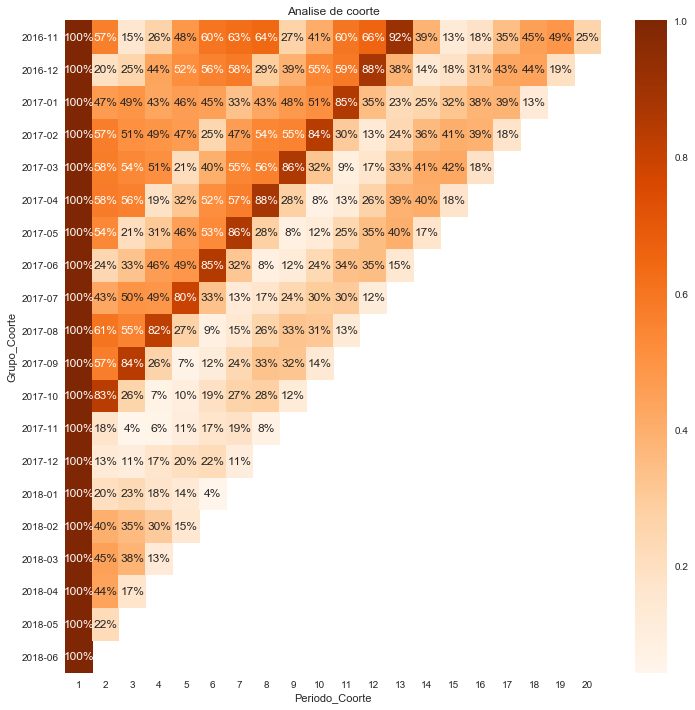

In [24]:
sns.set(style='white')

plt.figure(figsize=(12, 12))
plt.title('Analise de coorte')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), 
            cmap='Oranges', annot=True, fmt='.0%')
#plt.tight_layout()
plt.savefig('analise-coorte.png', dpi=100);